<a href="https://colab.research.google.com/github/carogaltier/matplotlib-population-pyramid/blob/main/population_pyramid_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stunning Population Pyramid in Matplotlib**

This tutorial demonstrates how to create a population pyramid using Matplotlib in Python. By the end, you will understand how to manipulate data and customize plots in Matplotlib to display the age and sex distribution in a visually appealing pyramid format.

## Step 1: Import Required Libraries
In this step, we will import the necessary libraries for data manipulation and visualization. We need `pandas` for handling the dataset and `matplotlib` for plotting the population pyramid.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Step 2: Create a Dummy DataFrame  
In this step, we will create a dummy DataFrame with columns for `sex` and `age`. The age distribution will resemble a realistic population distribution. The DataFrame will contain a total of 1000 rows, simulating a small sample population.


In [ ]:
# Step 2: Create a More Realistic Age Distribution
np.random.seed(42)  # For reproducibility

# Define probabilities for a more realistic age distribution with decreasing values
probabilities = [0.13 if age < 15 else 0.37 if age < 20 else 0.36 if age < 25 else 0.35 if age < 30 else
                 0.32 if age < 35 else 0.31 if age < 40 else 0.29 if age < 45 else 0.27 if age < 50 else
                 0.25 if age < 55 else 0.22 if age < 60 else 0.19 if age < 65 else 0.17 if age < 70 else
                 0.15 if age < 75 else 0.10 if age < 80 else 0.08 if age < 85 else 0.04 if age < 90 else 0.01 for age in range(101)]


# Normalize probabilities to sum to 1
probabilities = np.array(probabilities)
probabilities /= probabilities.sum()

# Define a more realistic age distribution with adjusted probabilities
age_distribution = np.random.choice(
    range(0, 101),
    size=5000,
    p=probabilities
)

# Define sex distribution with slight variation in older ages
sex_distribution = np.where(
    (age_distribution >= 60) & (age_distribution <= 100),
    np.random.choice(['Male', 'Female'], size=5000, p=[0.45, 0.55]),
    np.random.choice(['Male', 'Female'], size=5000, p=[0.49, 0.51])
)

# Create DataFrame
df = pd.DataFrame({
    'age': age_distribution,
    'sex': sex_distribution
})

# Display the first 5 rows of the DataFrame
df.head()

,age,sex
0,29,Male
1,77,Female
2,53,Male
3,43,Female
4,17,Male


## Step 3: Create Age Groups  
In this step, we will create age groups to categorize the population into different age ranges. This will allow us to visualize the population distribution by age and sex in the pyramid plot. We use the `pd.cut` method to create the age bins and assign labels to each age group.


In [ ]:
# Step 3: Create Age Groups
age_bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]  # Age categories
age_labels = ['0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']

# Add age group column to DataFrame
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Display the first 5 rows of the updated DataFrame
df.head()

,age,sex,age_group
0,29,Male,25-29
1,77,Female,75-79
2,53,Male,50-54
3,43,Female,40-44
4,17,Male,15-19


## Step 4: Group Data by Age Group and Sex  
Now, we will group the data by age group and sex to count the number of individuals in each category. This step prepares the data for plotting the population pyramid by calculating the population distribution across age groups for both males and females.


In [ ]:
# Step 4: Group Data by Age Group and Sex
gender_counts = df.groupby(['age_group', 'sex']).size().unstack(fill_value=0)

# Display the grouped data
gender_counts

<ipython-input-101-a8627072b106>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby(['age_group', 'sex']).size().unstack(fill_value=0)


sex,Female,Male
age_group,,
0-14,274,252
15-19,248,233
20-24,237,227
25-29,224,221
30-34,214,203
35-39,167,195
40-44,199,185
45-49,194,180
50-54,150,156


## Step 5: Prepare Data for Plotting  
In this step, we will prepare the data for plotting the population pyramid. We separate the counts for males and females, and negate the male values to display them on the left side of the pyramid. This separation is necessary for visualizing the population distribution by sex.


In [ ]:
# Step 5: Prepare Data for Plotting
males = -gender_counts['Male'].values  # Negate values to plot on the left
females = gender_counts['Female'].values

# Display the prepared data
males, females

(array([-252, -233, -227, -221, -203, -195, -185, -180, -156, -138, -108,
         -97,  -71,  -64,  -50,  -27,  -13]),
 array([274, 248, 237, 224, 214, 167, 199, 194, 150, 148, 135, 134,  93,
         71,  55,  23,  12]))

## Step 6: Plot the Population Pyramid  
In this step, we will create a basic population pyramid plot using `matplotlib`. We will plot the bars for males and females using simple colors and add titles and labels to the axes for a basic overview of the population distribution by age and sex.


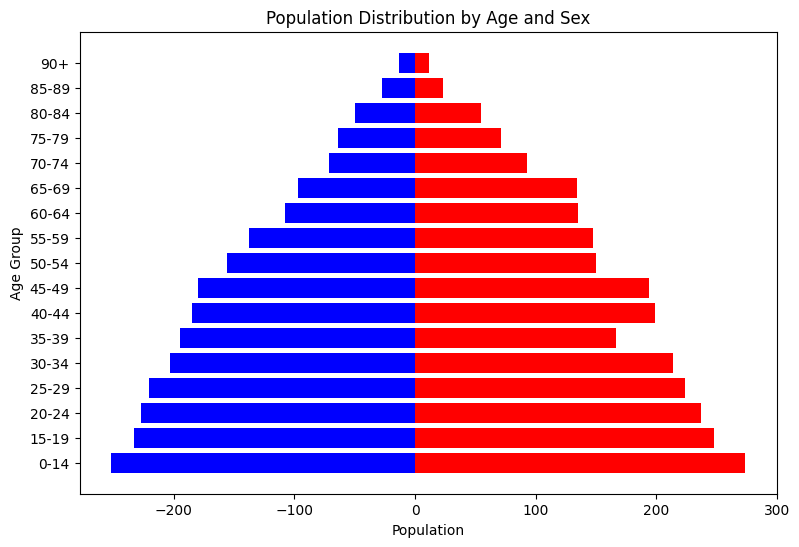

In [ ]:
# Step 6: Plot the Population Pyramid
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Plot bars
    bars_male = ax.barh(age_labels, males, color='blue', align='center', label='Male')
    bars_female = ax.barh(age_labels, females, color='red', align='center', label='Female')

    # Set titles and labels
    ax.set_title('Population Distribution by Age and Sex')
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Group')

    # Display the plot
    plt.show()

# Plotting the population pyramid
plot_population_pyramid(males, females, age_labels)

## Step 7: Customize Bars and Remove the Border Box  
Here, we will customize the appearance of the population pyramid. We will change the bar colors to more appealing ones and remove the border lines (spines) from the right and top of the plot to give it a cleaner look.

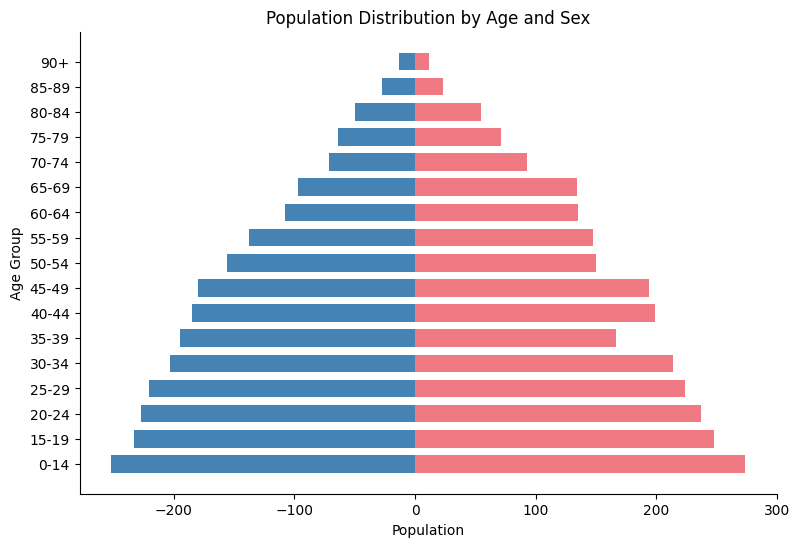

In [ ]:
# Step 7: Change Bar Colors and Remove the Border Box
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Plot custom bars
    bars_male = ax.barh(age_labels, males, color='#4583b5', align='center', height=0.7, label='Male', zorder=3)
    bars_female = ax.barh(age_labels, females, color='#ef7a84', align='center', height=0.7, label='Female', zorder=3)

    # Set titles and labels
    ax.set_title('Population Distribution by Age and Sex')
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Group')

    # Remove border (spines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Display the plot
    plt.show()

# Plotting the population pyramid with the new styles
plot_population_pyramid(males, females, age_labels)

## Step 8: Customize the Axis  
In this step, we will enhance the plot further by adjusting the x-axis and y-axis. We will shift the y-axis to the center, remove unnecessary y-axis ticks, and center the age group labels for a more balanced visualization. Additionally, we will adjust the x-axis to show absolute values and set the limits for better centering.


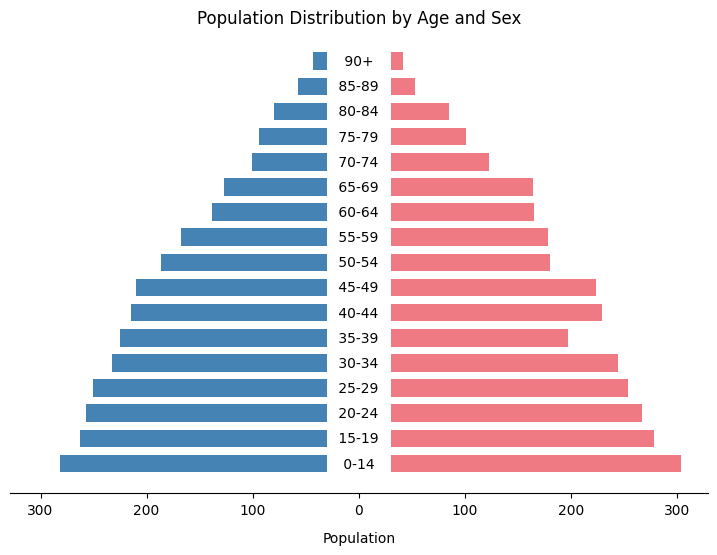

In [ ]:
# Step 8: Customize the Axis
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    shift = 30  # Adjust this based on your data scale

    # Plot custom bars
    bars_male = ax.barh(age_labels, males, color='#4583b5', align='center', height=0.7, left=-shift, label='Male', zorder=3)
    bars_female = ax.barh(age_labels, females, color='#ef7a84', align='center', height=0.7, left=shift, label='Female', zorder=3)

    # Set titles and labels
    ax.set_title('Population Distribution by Age and Sex')
    ax.set_xlabel('Population', labelpad=10)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Y-axis
    ax.spines['left'].set_position(('data', shift)) # Center the y-axis
    ax.yaxis.set_ticks_position('none') # Remove y-axis ticks
    for label in age_labels:
        ax.text(0, label, f' {label} ', va='center', ha='center', color='black', backgroundcolor='#ffffff') # Center y-axis labels

    # X-axis
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(abs(x))}')) # Set custom tick labels to show absolute values
    max_population = max(abs(males).max(), females.max()) * 1.2  # Find the max count either male or female
    ax.set_xlim(left=-max_population, right=max_population) # Adjust x-axis limits for centering

    # Display the plot
    plt.show()

# Plotting the population pyramid with centered y-axis, adjusted bar positions, and centered y-axis labels
plot_population_pyramid(males, females, age_labels)

## Step 9: Add Data Labels to the Bars  
In this step we will add percentage labels to each bar to show the proportion of the population in each age group. These labels will help provide more detailed insights into the distribution of the population by age and sex. We will position the labels on the ends of the bars for better readability.


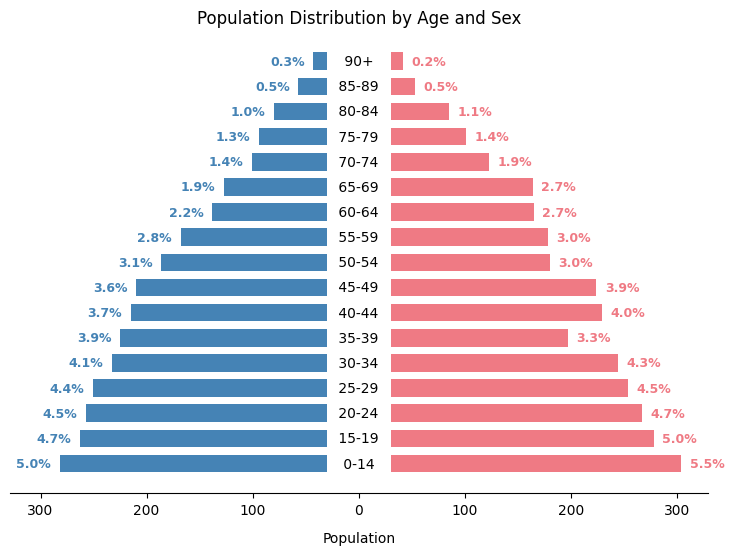

In [ ]:
# Step 9: Add Data Labels
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Calculate total population for percentage
    total_population = np.sum(gender_counts.values)

    shift = 30  # Adjust this based on your data scale

    # Plot bars with a custom size and color
    bars_male = ax.barh(age_labels, males, color='#4583b5', align='center', height=0.7, left=-shift, label='Male', zorder=3)
    bars_female = ax.barh(age_labels, females, color='#ef7a84', align='center', height=0.7, left=shift, label='Female', zorder=3)


    # Set titles and labels
    ax.set_title('Population Distribution by Age and Sex')
    ax.set_xlabel('Population', labelpad=10)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Y-axis
    ax.spines['left'].set_position(('data', shift)) # Center the y-axis
    ax.yaxis.set_ticks_position('none') # Remove y-axis ticks
    for label in age_labels:
        ax.text(0, label, f' {label} ', va='center', ha='center', color='black', backgroundcolor='#ffffff') # Center y-axis labels

    # X-axis
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(abs(x))}')) # Set custom tick labels to show absolute values
    max_population = max(abs(males).max(), females.max()) * 1.2  # Find the max count either male or female
    ax.set_xlim(left=-max_population, right=max_population) # Adjust x-axis limits for centering


    # Add data labels
    label_offset = 8 # Distance to offset the label from the bar end
    fontsize = 9  # Font size for the labels

    for bar in bars_male:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width - label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{abs(width) / total_population:.1%}', va='center', ha='right', color='#4583b5', fontsize=fontsize, fontweight='bold')

    for bar in bars_female:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width + label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{width / total_population:.1%}', va='center', ha='left', color='#ef7a84', fontsize=fontsize, fontweight='bold')

    # Display the plot
    plt.show()

# Plotting the population pyramid with centered y-axis, adjusted bar positions, and centered y-axis labels
plot_population_pyramid(males, females, age_labels)


## Step 10: Customize Background and Add Borders  
In this step, we will enhance the plot by adjusting the background colors, adding a border around the figure, and refining the title placement. These changes will give the population pyramid a cleaner and more polished appearance.

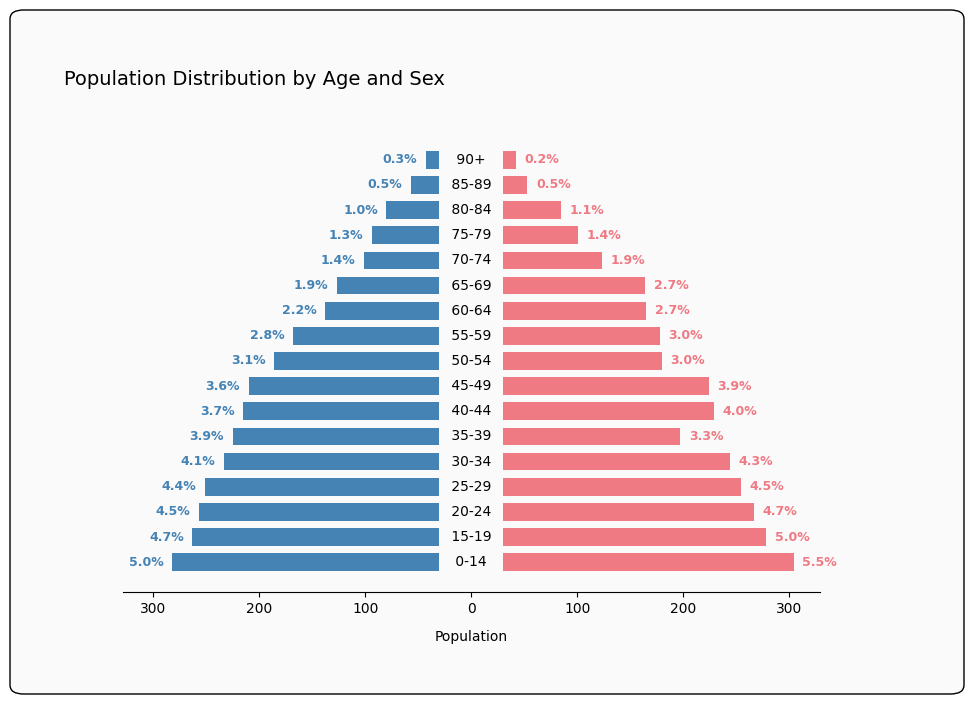

In [ ]:
# Step 10: Customize Background
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Calculate total population for percentage
    total_population = np.sum(gender_counts.values)

    shift = 30  # Adjust this based on your data scale

    # Plot bars with a custom size and color
    bars_male = ax.barh(age_labels, males, color='#4583b5', align='center', height=0.7, left=-shift, label='Male', zorder=3)
    bars_female = ax.barh(age_labels, females, color='#ef7a84', align='center', height=0.7, left=shift, label='Female', zorder=3)


    # Set titles and labels
    fig.suptitle('Population Distribution by Age and Sex', fontsize=14, x=0.06, y=0.98, ha="left") #Customize title
    ax.set_xlabel('Population', labelpad=10)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Y-axis
    ax.spines['left'].set_position(('data', shift)) # Center the y-axis
    ax.yaxis.set_ticks_position('none') # Remove y-axis ticks
    for label in age_labels:
        ax.text(0, label, f' {label} ', va='center', ha='center', color='black', backgroundcolor='#fafafa') # Center y-axis labels

    # X-axis
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(abs(x))}')) # Set custom tick labels to show absolute values
    max_population = max(abs(males).max(), females.max()) * 1.2  # Find the max count either male or female
    ax.set_xlim(left=-max_population, right=max_population) # Adjust x-axis limits for centering


    # Add data labels
    label_offset = 8 # Distance to offset the label from the bar end
    fontsize = 9  # Font size for the labels

    for bar in bars_male:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width - label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{abs(width) / total_population:.1%}', va='center', ha='right', color='#4583b5', fontsize=fontsize, fontweight='bold')

    for bar in bars_female:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width + label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{width / total_population:.1%}', va='center', ha='left', color='#ef7a84', fontsize=fontsize, fontweight='bold')

    # Adding a custom rectangle as a border around the figure
    border_radius = 0.015
    rect = patches.FancyBboxPatch((0.03, -0.03), 1, 1.08, transform=fig.transFigure, facecolor="#fafafa",
                                  edgecolor='black', linewidth=1, clip_on=False, zorder=-3, linestyle='-',
                                  boxstyle=f"round,pad=0.03,rounding_size={border_radius}")
    fig.patches.extend([rect])
    ax.set_facecolor('#fafafa')  # Set the background color of the axes

    # Display the plot
    plt.show()

# Plotting the population pyramid with centered y-axis, adjusted bar positions, and centered y-axis labels
plot_population_pyramid(males, females, age_labels)

## Step 11: Add Summary Labels and Corner Data  
In this step, we will enhance the plot by adding summary labels that display the total number and percentage of males and females in the top corners. These labels provide a quick overview of the population distribution. Additionally, we will include all previous styling elements, such as the custom border, background color, and centered y-axis.


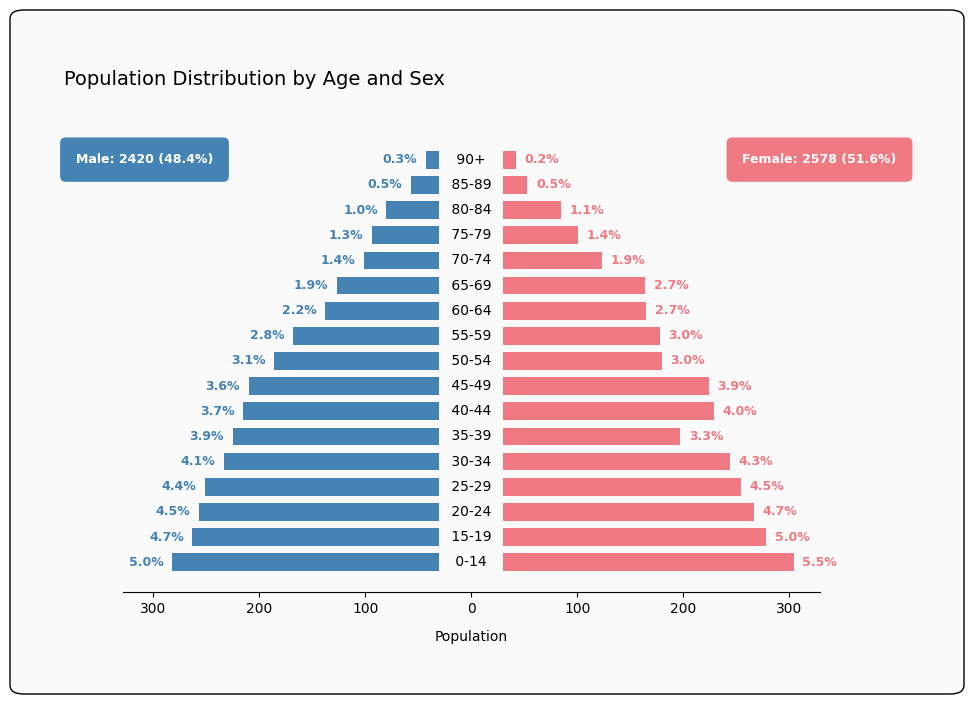

In [289]:
# Step 11: Add Summary Labels and Corner Data
def plot_population_pyramid(males, females, age_labels):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Calculate total population for percentage
    total_population = np.sum(gender_counts.values)

    shift = 30  # Adjust this based on your data scale

    # Plot bars with a custom size and color
    bars_male = ax.barh(age_labels, males, color='#4583b5', align='center', height=0.7, left=-shift, label='Male', zorder=3)
    bars_female = ax.barh(age_labels, females, color='#ef7a84', align='center', height=0.7, left=shift, label='Female', zorder=3)


    # Set titles and labels
    fig.suptitle('Population Distribution by Age and Sex', fontsize=14, x=0.06, y=0.98, ha="left") #Customize title
    ax.set_xlabel('Population', labelpad=10)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Y-axis
    ax.spines['left'].set_position(('data', shift)) # Center the y-axis
    ax.yaxis.set_ticks_position('none') # Remove y-axis ticks
    for label in age_labels:
        ax.text(0, label, f' {label} ', va='center', ha='center', color='black', backgroundcolor='#fafafa') # Center y-axis labels

    # X-axis
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(abs(x))}')) # Set custom tick labels to show absolute values
    max_population = max(abs(males).max(), females.max()) * 1.2  # Find the max count either male or female
    ax.set_xlim(left=-max_population, right=max_population) # Adjust x-axis limits for centering


    # Add data labels
    label_offset = 8 # Distance to offset the label from the bar end
    fontsize = 9  # Font size for the labels

    for bar in bars_male:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width - label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{abs(width) / total_population:.1%}', va='center', ha='right', color='#4583b5', fontsize=fontsize, fontweight='bold')

    for bar in bars_female:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width + label_offset  # Adjust position outside the bar
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
                f'{width / total_population:.1%}', va='center', ha='left', color='#ef7a84', fontsize=fontsize, fontweight='bold')



    # Adding a custom rectangle as a border around the figure
    border_radius = 0.015
    rect = patches.FancyBboxPatch((0.03, -0.03), 1, 1.08, transform=fig.transFigure, facecolor="#fafafa",
                                  edgecolor='black', linewidth=1, clip_on=False, zorder=-3, linestyle='-',
                                  boxstyle=f"round,pad=0.03,rounding_size={border_radius}")
    fig.patches.extend([rect])
    ax.set_facecolor('#fafafa')  # Set the background color of the axes


     # Adding data for males and females in corners
    ax.text(1.11, 0.95,
            f'Female: {np.sum(females)} ({np.sum(females) / total_population:.1%})',
            transform=ax.transAxes,
            fontsize=9,
            ha='right',
            va='top',
            color="white",
            weight='bold',
            bbox=dict(facecolor='#ef7a84', edgecolor='#ef7a84', boxstyle=f"round,pad=1.2,rounding_size={0.4}"))

    ax.text(0.13, 0.95, f'Male: {np.sum(males) * -1} ({np.sum(males) * -1 / total_population:.1%})',
            transform=ax.transAxes,
            fontsize=9,
            ha='right',
            va='top',
            color="white",
            weight='bold',
            bbox=dict(facecolor='#4583b5', edgecolor='#4583b5', boxstyle=f"round,pad=1.2,rounding_size={0.4}"))


    # Display the plot
    plt.show()

# Plotting the population pyramid with centered y-axis, adjusted bar positions, and centered y-axis labels
plot_population_pyramid(males, females, age_labels)